In [253]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from matplotlib import pyplot as plt
%matplotlib inline

In [254]:
X = np.linspace(-10, 10, 1000)
np.random.shuffle(X)
y = 0.5 * X ** 5 + 1.3 * X ** 3 + 3 * X ** 2 + 10 +  np.random.randn(X.shape[0]) * 20000

Text(0.5,1,'Наши точки')

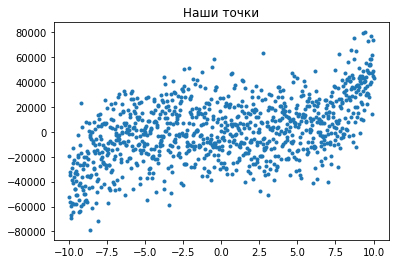

In [255]:
plt.plot(X, y,'.')
plt.title('Наши точки')

_______________________________________________________________________
Ниже представлен код, как если бы мы сразу аппроксимировали полиномом 5 степени

In [256]:

lr = LinearRegression(fit_intercept=True)
pf = PolynomialFeatures(degree=5)

In [257]:
X = X.reshape(len(X), 1)

In [258]:
X_poly = pf.fit_transform(X.reshape(-1, 1))

In [259]:
lr.fit(X_poly, y)
y_pred = lr.predict(X_poly)

In [260]:
y_pred = y_pred.reshape(len(y_pred), 1)
res = np.hstack((X, y_pred))
res = np.array(sorted(res, key = lambda x: x[0]))

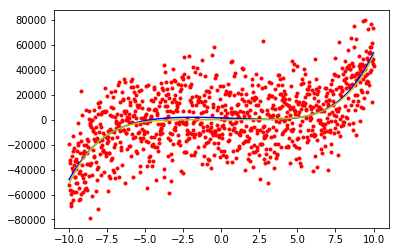

In [261]:
plt.plot(X, y, 'r.')
plt.plot(res[:,0], res[:, 1], 'b-');
plt.plot(res[:,0], 0.5 * res[:,0] ** 5 + 1.3 * res[:,0] ** 3 + 3 * res[:,0] ** 2 + 10, 'y-')

In [262]:
lr.coef_

array([   0.        , -396.28260508,  -61.71998837,   15.14543437,
          0.75534931,    0.39696962])

In [263]:
lr.intercept_

1519.1410226266635

Здесь заканчивается наша каноническое представление, вычисленное c помщью встроенных средств
________________________________________________________________________

In [264]:
Fx = np.array([0, 1, 2, 3, 4, 5]) #степени полинома

In [279]:
def get_low_high(X_poly, T, y_pred):
    '''
    varY посчитан по формуле, что дана была в дз, но я что-то не понял ее, 
    по мне, так она возвращает ковариационную матрицу n x n,
    у которой дисперсии стоят на главной диагонали, собственно,
    я и взял элементы на главной диагонали, как дисперсии, и на основе них посчитал
    y_low и y_high, неуверен, что правильно, но что-то получилось :)).
    '''
    y_low = np.array([])
    y_high = np.array([])
    varY = np.var(X_poly) * X_poly @ np.linalg.inv(T) @ X_poly.transpose()
    for i in range(len(X_poly)):
        y_low = np.append(y_low, y_pred[i] - np.sqrt(varY[i][i]))
        y_high = np.append(y_high, y_pred[i] + np.sqrt(varY[i][i]))
    return y_low, y_high

In [283]:
def draw_graph(X, y, y_pred, y_low, y_high):
    X = X.reshape(len(X), 1)
    y_pred = y_pred.reshape(len(y_pred), 1)
    y_low = y_low.reshape(len(y_low), 1)
    y_high = y_high.reshape(len(y_high), 1)
    res = np.hstack((X, y_pred, y_low, y_high))
    res = np.array(sorted(res, key = lambda x: x[0]))
    plt.plot(X, y, 'r.')
    plt.plot(res[:, 0], res[:, 1], 'b-');
    plt.plot(res[:, 0], 0.5 * res[:, 0] ** 5 + 1.3 * res[:, 0] ** 3 + 3 * res[:, 0] ** 2 + 10, 'y-')
    plt.plot(res[:, 0], res[:, 2], 'b--');
    plt.plot(res[:, 0], res[:, 3], 'b--');
    plt.show()

In [284]:
T = np.random.randn(len(Fx), len(Fx))
v = np.random.randn(len(Fx)).reshape(len(Fx),1)
V = np.random.randn(len(Fx))
n = 0
pf = PolynomialFeatures(degree=5)
X_cumulative = np.array([])
varX = np.var(X)

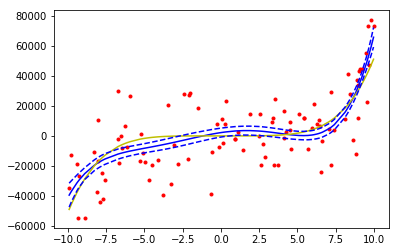

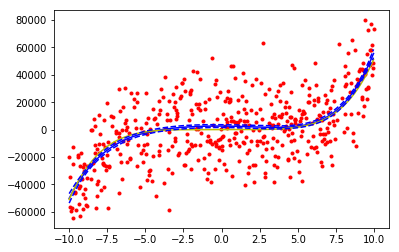

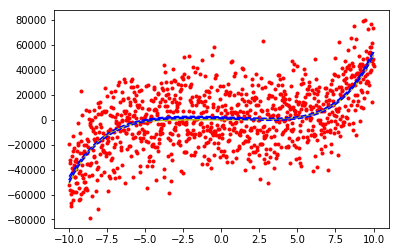

In [285]:
for i in range(X.shape[0]):
    X_cumulative = np.append(X_cumulative, X[i])
    Vi = y[i] ** 2
    Fi = np.array([X[i] ** j for j in range(len(Fx))]).reshape(1, len(Fx))
    vi = Fi.reshape(len(Fx),1) * y[i]
    Ti = Fi.reshape(len(Fx),1) @ Fi
    # update (T,v,V,n)
    T +=Ti
    v +=vi
    V +=Vi
    n +=1
    if n == X.shape[0]//10:
        coef = np.linalg.inv(T) @ v
        X_poly = pf.fit_transform(X_cumulative.reshape(-1, 1))
        y_pred = X_poly @ coef
        y_low, y_high = get_low_high(X_poly, T, y_pred)
        draw_graph(X_cumulative, y[:n], y_pred, y_low, y_high)
    if n == X.shape[0]//2:
        coef = np.linalg.inv(T) @ v
        X_poly = pf.fit_transform(X_cumulative.reshape(-1, 1))
        y_pred = X_poly @ coef
        y_low, y_high = get_low_high(X_poly, T, y_pred)
        draw_graph(X_cumulative, y[:n], y_pred, y_low, y_high)
    if n == X.shape[0]:
        coef = np.linalg.inv(T) @ v
        X_poly = pf.fit_transform(X_cumulative.reshape(-1, 1))
        y_pred = X_poly @ coef
        y_low, y_high = get_low_high(X_poly, T, y_pred)
        draw_graph(X_cumulative, y[:n], y_pred, y_low, y_high)